# 《绝地求生》玩家排名预测
                   ---- 你能预测《绝地求生》玩家战斗结束后的排名吗？


![img1](./img/img1.png)

# 项目背景
## 项目简介
绝地求生(Player unknown's Battlegrounds)，俗称吃鸡，是一款战术竞技型射击类沙盒游戏。
这款游戏是一款大逃杀类型的游戏，每一局游戏将有最多100名玩家参与，他们将被投放在绝地岛(battlegrounds)上，在游戏的开始时所有人都一无所有。玩家需要在岛上收集各种资源，在不断缩小的安全区域内对抗其他玩家，让自己生存到最后。

该游戏拥有很高的自由度，玩家可以体验飞机跳伞、开越野车、丛林射击、抢夺战利品等玩法，小心四周埋伏的敌人，尽可能成为最后1个存活的人。


![img2](./img/img2.png)

## 项目涉及知识点
 - sklearn基本操作
 - 数据基本处理
 - 机器学习基本算法的使用


## 数据集介绍
本项目中，将为您提供大量匿名的《绝地求生》游戏统计数据。
其格式为每行包含一个玩家的游戏后统计数据，列为数据的特征值。
数据来自所有类型的比赛：单排，双排，四排；不保证每场比赛有100名人员，每组最多4名成员。

文件说明:

- train_V2.csv - 训练集

- test_V2.csv - 测试集


数据集局部图如下图所示:

![img3](./img/img3.png)

数据集中字段解释：

- Id [用户id]
  - Player’s Id
- groupId [所处小队id]
  - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- matchId [该场比赛id]
  - ID to identify match. There are no matches that are in both the training and testing set.
- assists [助攻数]
  - Number of enemy players this player damaged that were killed by teammates.
- boosts [使用能量,道具数量]
  - Number of boost items used.
- damageDealt [总伤害]
  - Total damage dealt. Note: Self inflicted damage is subtracted.
- DBNOs [击倒敌人数量]
  - Number of enemy players knocked.
- headshotKills [爆头数]
  - Number of enemy players killed with headshots.
- heals [使用治疗药品数量]
  - Number of healing items used.
- killPlace [本厂比赛杀敌排行]
  - Ranking in match of number of enemy players killed.
- killPoints [Elo杀敌排名]
  - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- kills [杀敌数]
  - Number of enemy players killed.
- killStreaks [连续杀敌数]
  - Max number of enemy players killed in a short amount of time.
- longestKill [最远杀敌距离]
  - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration [比赛时长] 
  - Duration of match in seconds.
- matchType [比赛类型(小组人数)]
  - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- maxPlace [本局最差名次]
  - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- numGroups [小组数量]
  - Number of groups we have data for in the match.
- rankPoints [Elo排名]
  - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives [救活队员的次数]
  - Number of times this player revived teammates.
- rideDistance [驾车距离]
  - Total distance traveled in vehicles measured in meters.
- roadKills [驾车杀敌数]
  - Number of kills while in a vehicle.
- swimDistance [游泳距离]
  - Total distance traveled by swimming measured in meters.
- teamKills [杀死队友的次数]
  - Number of times this player killed a teammate.
- vehicleDestroys [毁坏机动车的数量]
  - Number of vehicles destroyed.
- walkDistance [步行距离]
  - Total distance traveled on foot measured in meters.
- weaponsAcquired [收集武器的数量]
  - Number of weapons picked up.
- winPoints [胜率Elo排名]
  - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- winPlacePerc [百分比排名]
  - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# 项目评估方式
## 评估方式
你必须创建一个模型，根据他们的最终统计数据预测玩家的排名，从1（第一名）到0（最后一名）。

最后结果通过平均绝对误差（MAE）进行评估，即通过预测的winPlacePerc和真实的winPlacePerc之间的平均绝对误差

## MAE(Maean Absolute Error)介绍
 - 就是绝对误差的平均值
 - 能更好地反映预测值误差的实际情况
     $$ MAE(X,h) = \frac{1}{m} \sum_{i=1}^{m} {|h(x^{(i)}) - y^{(i)}|}$$
 
api:
 - sklearn.metrics.mean_absolute_error

# 项目实现（数据分析+RL）
在接下来的分析中，我们将分析数据集，检测异常值。

然后我们通过随机森林模型对其训练，并对对该模型进行了优化。

In [3]:
# 导入数据基本处理阶段需要用到的api
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 获取数据、基本数据信息查看
导入数据，且查看数据的基本信息

In [4]:
train = pd.read_csv("../data/train_V2.csv")

In [13]:
new_train = train.dropna()

In [14]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


可以看到数据一共有4446966条，

In [15]:
train.shape



(4446965, 29)

## 数据基本处理
### 数据缺失值处理
查看目标值，我们发现有一条样本，比较特殊，其“winplaceperc”的值为NaN，也就是目标值是缺失值，

因为只有一个玩家是这样，直接进行删除处理。

In [8]:
# 查看缺失值
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
# 删除缺失值
train.drop(2744604, inplace=True)

In [10]:
train.shape

(4446965, 29)

### 特征数据规范化处理
#### 查看每场比赛参加的人数
处理完缺失值之后，我们看一下每场参加的人数会有多少呢，是每次都会匹配100个人，才开始游戏吗？

In [11]:
# 显示每场比赛参加人数
# transform的作用类似实现了一个一对多的映射功能，把统计数量映射到对应的每个样本上
count = train.groupby('matchId')['matchId'].transform('count')

In [12]:
train['playersJoined'] = count

In [13]:
count.count()

4446965

In [14]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [15]:
# 通过每场参加人数进行，按值升序排列
train["playersJoined"].sort_values().head()

1206365    2
2109739    2
3956552    5
3620228    5
696000     5
Name: playersJoined, dtype: int64

通过结果发现，最少的一局，竟然只有两个人，wtf!!!!

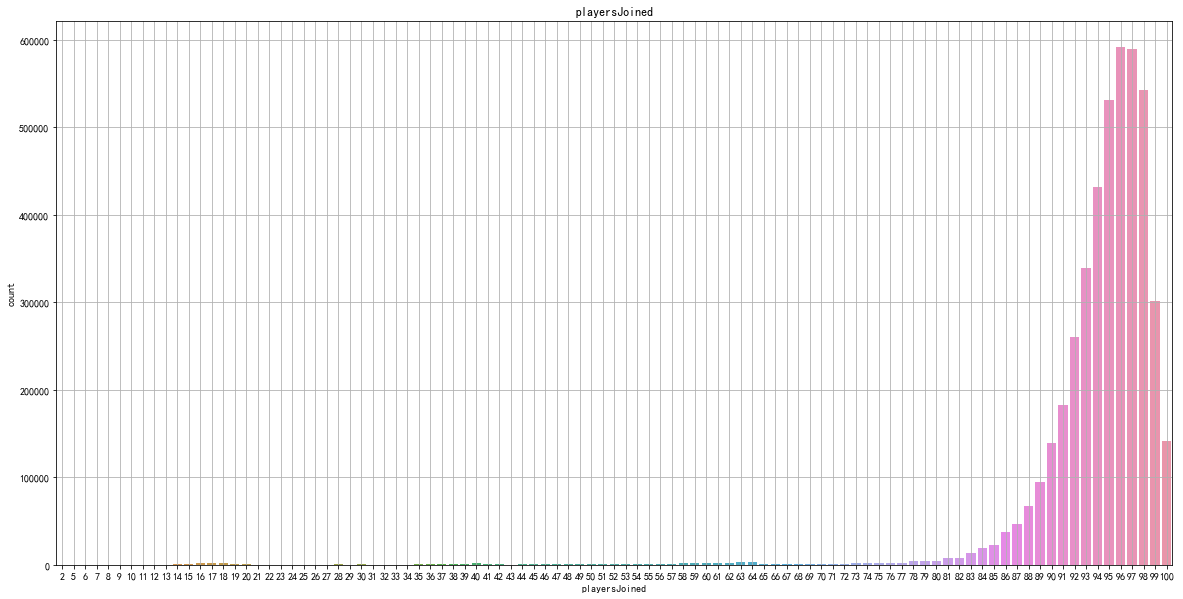

In [16]:
# 通过绘制图像，查看每局开始人数
# 通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,10))
sns.countplot(train['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

通过观察，发现一局游戏少于75个玩家，就开始的还是比较少

同时大部分游戏都是在接近100人的时候才开始

限制每局开始人数大于等于75，再进行绘制。

猜想：把这些数据在后期加入数据处理，应该会得到的结果更加准确一些

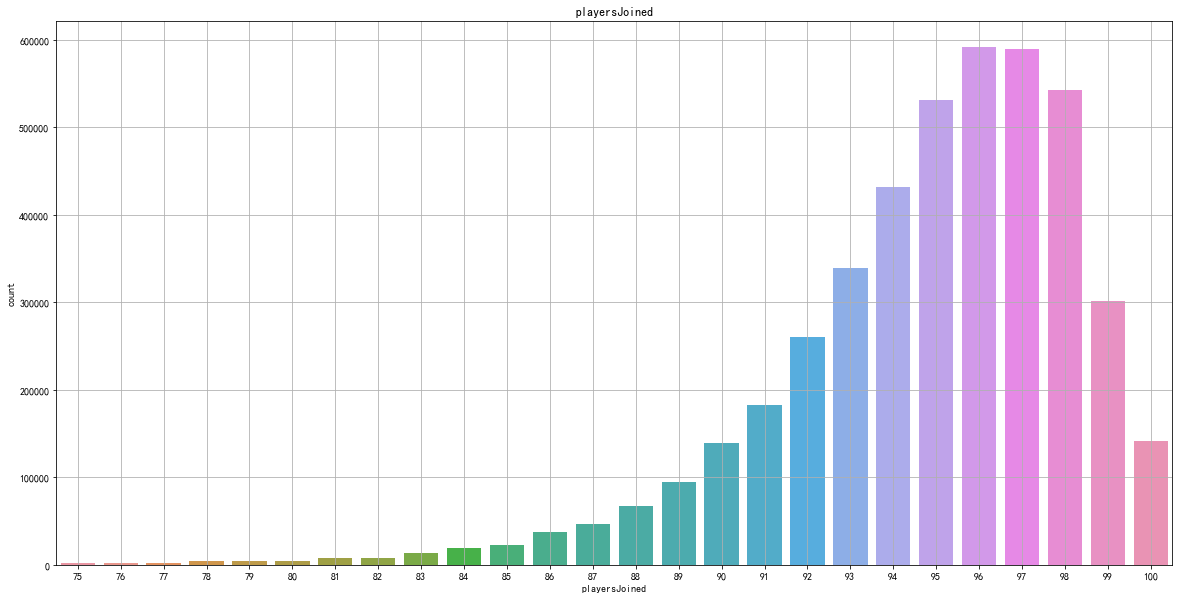

In [17]:
# 再次绘制每局参加人数的直方图
plt.figure(figsize=(20,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

#### 规范化输出部分数据

现在我们统计了“每局玩家数量”，那么我们就可以通过“每局玩家数量”来进一步考证其它特征，同时对其规范化设置

试想：一局只有70个玩家的杀敌数，和一局有100个玩家的杀敌数，应该是不可以同时比较的

可以考虑的特征值包括
 - 1.kills（杀敌数）

 - 2.damageDealt（总伤害）

 - 3.maxPlace（本局最差名次）

 - 4.matchDuration（比赛时长）

In [18]:
# 对部分特征值进行规范化
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)

In [19]:
# 比较经过规范化的特征值和原始特征值的值
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


### 部分变量合成
此处我们把特征：heals(使用治疗药品数量)和boosts(能量、道具使用数量)合并成一个新的变量，命名：”healsandboosts“， 这是一个探索性过程，最后结果不一定有用，如果没有实际用处，最后再把它删除。

In [20]:
# 创建新变量“healsandboosts”
train['healsandboosts'] = train['heals'] + train['boosts']

In [21]:
train[["heals", "boosts", "healsandboosts"]].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


### 异常值处理
#### 异常值处理：删除有击杀，但是完全没有移动的玩家
异常数据处理：

一些行中的数据统计出来的结果非常反常规，那么这些玩家肯定有问题，为了训练模型的准确性，我们会把这些异常数据剔除

通过以下操作，识别出玩家在游戏中有击杀数，但是全局没有移动；

这类型玩家肯定是存在异常情况（挂**），我们把这些玩家删除。

In [22]:
# 创建新变量，统计玩家移动距离
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# 创建新变量，统计玩家是否在游戏中，有击杀，但是没有移动，如果是返回True, 否则返回false
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [23]:
train["killsWithoutMoving"].head()

0    False
1    False
2    False
3    False
4    False
Name: killsWithoutMoving, dtype: bool

In [24]:
train["killsWithoutMoving"].describe()

count     4446965
unique          2
top         False
freq      4445430
Name: killsWithoutMoving, dtype: object

In [25]:
# 检查是否存在有击杀但是没有移动的数据
train[train['killsWithoutMoving'] == True].shape

(1535, 37)

In [26]:
train[train['killsWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0,0.8571,58,8.52,842.060,21.30,842.06,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0,0.6000,42,4.74,547.628,17.38,2834.52,6,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.8947,21,35.80,3132.500,35.80,1607.42,5,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,1500,0.0000,73,1.27,200.406,24.13,1014.73,0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0,0.3000,42,1.58,158.000,17.38,2834.52,0,0.0,True


In [27]:
# 删除这些数据
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

#### 异常值处理：删除驾车杀敌数异常的数据

In [28]:
# 查看载具杀敌数超过十个的玩家
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False


In [29]:
# 删除这些数据
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [30]:
train.shape

(4445426, 37)

#### 异常值处理：删除玩家在一局中杀敌数超过30人的数据

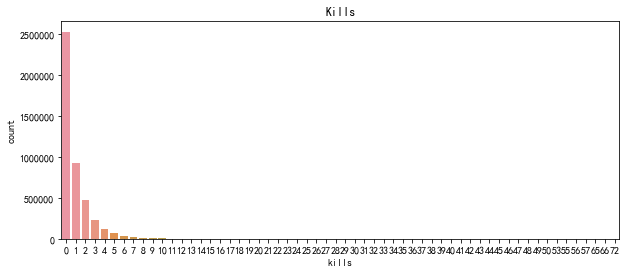

In [31]:
# 首先绘制玩家杀敌数的条形图
plt.figure(figsize=(10,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

In [32]:
train[train['kills'] > 30].shape

(95, 37)

In [33]:
train[train['kills'] > 30].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False


In [34]:
# 异常数据删除
train.drop(train[train['kills'] > 30].index, inplace=True)

#### 异常值处理：删除爆头率异常数据
如果一个玩家的击杀爆头率过高，也说明其有问题

In [35]:
# 创建变量爆头率
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [36]:
train["headshot_rate"].tail()

4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, dtype: float64

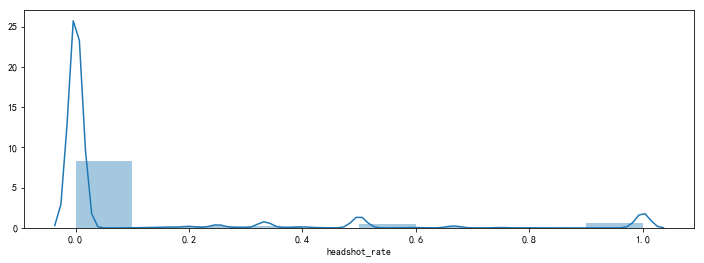

In [37]:
# 绘制爆头率图像
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

In [38]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape

(24, 38)

In [39]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0


In [40]:
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].index, inplace=True)

#### 异常值处理：删除最远杀敌距离异常数据

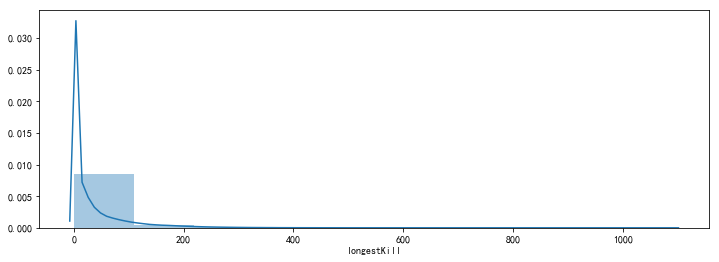

In [41]:
# 绘制图像
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

In [42]:
# 找出最远杀敌距离大于等于1km的玩家
train[train['longestKill'] >= 1000].shape

(20, 38)

In [43]:
train[train['longestKill'] >= 1000]["longestKill"].head()

202281    1000.0
240005    1004.0
324313    1026.0
656553    1000.0
803632    1075.0
Name: longestKill, dtype: float64

In [44]:
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [45]:
train.shape

(4445287, 38)

#### 异常值处理：删除关于运动距离的异常值

In [46]:
# 距离整体描述
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445287e+06,4.445287e+06,4.445287e+06,4.445287e+06
mean,1.154619e+03,6.063215e+02,4.510898e+00,1.765451e+03
std,1.183508e+03,1.498562e+03,3.050738e+01,2.183248e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863000e+02,0.000000e+00,0.000000e+00,7.892500e+02
75%,1.977000e+03,2.566000e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


##### a）行走距离处理

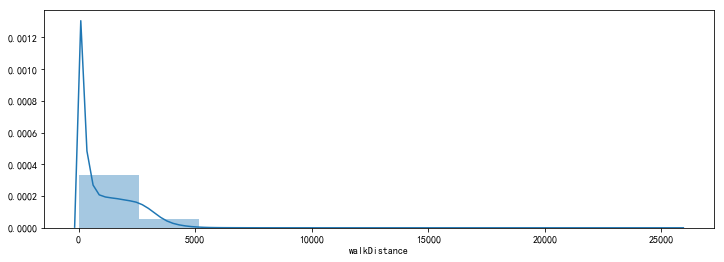

In [47]:
plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()

In [48]:
train[train['walkDistance'] >= 10000].shape

(219, 38)

In [49]:
train[train['walkDistance'] >= 10000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0


In [50]:
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

#####  b）载具行驶距离处理

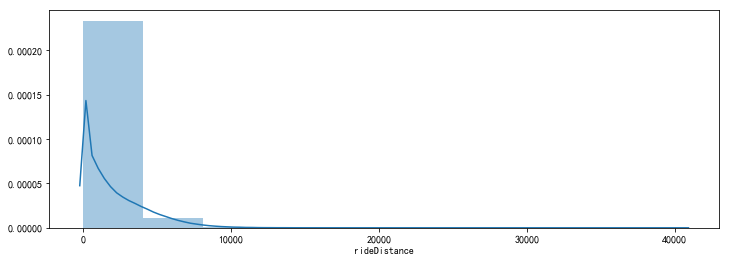

In [51]:
plt.figure(figsize=(12,4))
sns.distplot(train['rideDistance'], bins=10)
plt.show()

In [52]:
train[train['rideDistance'] >= 20000].shape

(150, 38)

In [53]:
train[train['rideDistance'] >= 20000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.2,0,0,1,30,...,0.6421,96,1.04,103.168,99.84,1969.76,1,26306.6,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.0,0,0,0,55,...,0.5376,94,0.00,0.000,99.64,2004.46,0,22065.4,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.0,0,0,0,26,...,0.8878,99,1.01,101.000,99.99,1947.28,0,28917.5,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.0,0,0,0,46,...,0.7917,97,0.00,0.000,99.91,1861.21,0,21197.2,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.2,0,1,2,2,...,0.9785,94,7.42,824.892,99.64,1986.44,9,26733.2,False,0.142857


In [54]:
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)

##### c）游泳距离处理

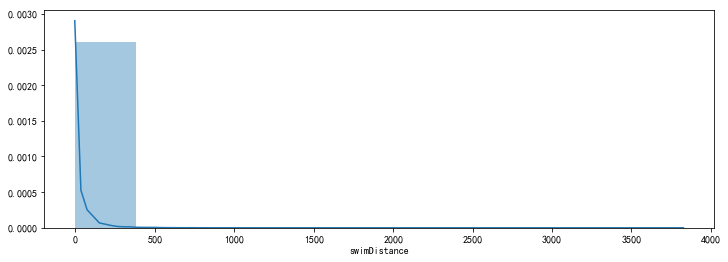

In [55]:
plt.figure(figsize=(12,4))
sns.distplot(train['swimDistance'], bins=10)
plt.show()

In [56]:
train[train['swimDistance'] >= 2000].shape

(12, 38)

In [57]:
train[train['swimDistance'] >= 2000][["swimDistance"]]

,swimDistance
177973,2295.0
274258,2148.0
1005337,2718.0
1195818,2668.0
1227362,3823.0
1889163,2484.0
2065940,3514.0
2327586,2387.0
2784855,2206.0
3359439,2338.0


In [58]:
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

#### 异常值处理：武器收集异常值处理

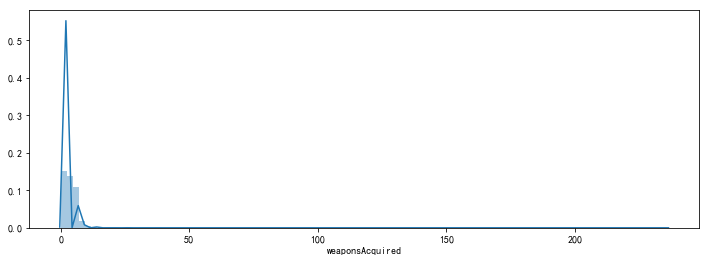

In [59]:
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

In [60]:
train[train['weaponsAcquired'] >= 80].shape

(19, 38)

In [61]:
train[train['weaponsAcquired'] >= 80][['weaponsAcquired']].head()

,weaponsAcquired
233643,128
588387,80
1437471,102
1449293,95
1592744,94


In [62]:
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

#### 异常值处理：删除使用治疗药品数量异常值

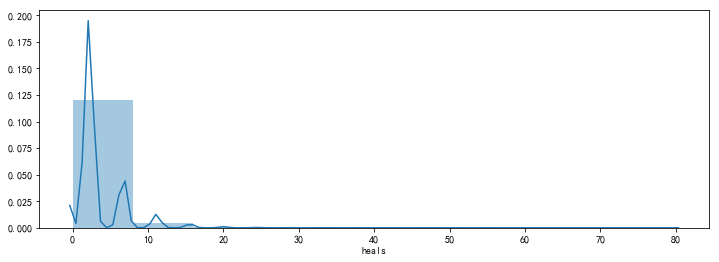

In [63]:
plt.figure(figsize=(12,4))
sns.distplot(train['heals'], bins=10)
plt.show()

In [64]:
train[train['heals'] >= 40].shape

(135, 38)

In [65]:
train[train['heals'] >= 40][["heals"]].head()

,heals
18405,47
54463,43
126439,52
259351,42
268747,48


In [66]:
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [67]:
train.shape

(4444752, 38)

### 类别型数据处理
#### 比赛类型one-hot处理

In [68]:
# 关于比赛类型，共有16种方式
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [69]:
# 对matchType进行one_hot编码
# 通过在后面添加的方式,实现,赋值并不是替换
train = pd.get_dummies(train, columns=['matchType'])

In [70]:
train.shape

(4444752, 53)

In [71]:
# 通过正则匹配查看具体内容
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### 对groupId,matchId等数据进行处理
关于groupId,matchId这类型数据，也是类别型数据。但是它们的数据量特别多，如果你使用one-hot编码，无异于自杀。

在这儿我们把它们变成用数字统计的类别型数据依旧不影响我们正常使用。

In [72]:
# 把groupId 和 match Id 转换成类别类型 categorical types
# 就是把一堆不怎么好识别的内容转换成数字

# 转换group_id
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: object

In [73]:
train['groupId'] = train['groupId'].astype('category')

In [74]:
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: category
Categories (2026153, object): [00000c08b5be36, 00000d1cbbc340, 000025a09dd1d7, 000038ec4dff53, ..., fffff305a0133d, fffff32bc7eab9, fffff7edfc4050, fffff98178ef52]

In [75]:
train["groupId_cat"] = train["groupId"].cat.codes

In [76]:
train["groupId_cat"].head()

0     613591
1     827580
2     843271
3    1340070
4    1757334
Name: groupId_cat, dtype: int32

In [77]:
# 转换match_id
train['matchId'] = train['matchId'].astype('category')

train['matchId_cat'] = train['matchId'].cat.codes


In [78]:
# 删除之前列
train.drop(['groupId', 'matchId'], axis=1, inplace=True)

# 查看新产生列
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613591,30085
1,827580,32751
2,843271,3143
3,1340070,45260
4,1757334,20531


In [79]:
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,613591,30085
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,827580,32751
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,843271,3143
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1340070,45260
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1757334,20531


### 数据截取
#### 取部分数据进行使用（1000000）

In [80]:
# 取前100万条数据，进行训练
sample = 1000000
df_sample = train.sample(sample)

In [81]:
df_sample.shape

(1000000, 53)

### 确定特征值和目标值

In [82]:
# 确定特征值和目标值
df = df_sample.drop(["winPlacePerc", "Id"], axis=1) #all columns except target

y = df_sample['winPlacePerc'] # Only target variable

In [83]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
565181,0,0,0.0,0,0,0,29,1210,1,1,...,0,0,0,0,0,0,0,0,784273,45231
1278768,0,0,0.0,0,0,0,70,0,0,0,...,0,0,0,0,0,1,0,0,724178,24323
884983,1,4,170.1,2,0,2,23,0,1,1,...,0,0,0,0,0,0,0,1,978249,12809
3040251,0,2,273.2,1,0,5,22,1173,1,1,...,0,0,0,0,0,0,0,1,184567,31273
2285385,1,0,178.0,1,0,0,44,1245,1,1,...,0,0,0,0,0,0,0,0,889319,3893


In [84]:
y.head()

565181     0.5217
1278768    0.2527
884983     0.9231
3040251    0.8889
2285385    0.0417
Name: winPlacePerc, dtype: float64

In [85]:
print(df.shape, y.shape)

(1000000, 51) (1000000,)


### 分割训练集和验证集

In [86]:
# 自定义函数，分割训练集和验证集
def split_vals(a, n : int): 
    # ps: n:int 是一种新的定义函数方式，告诉你这个n,传入应该是int类型，但不是强制的
    return a[:n].copy(), a[n:].copy()
val_perc = 0.12 # % to use for validation set
n_valid = int(val_perc * sample) 
n_trn = len(df)-n_valid

# 分割数据集
raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# 检查数据集维度
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (880000, 51) 
Sample target shape:  (880000,) 
Sample validation shape:  (120000, 51)


## 机器学习（模型训练）和评估

In [87]:
# 导入需要训练和评估api
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### 初步使用随机森林进行模型训练

In [88]:
# 模型训练
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
y_pre = m1.predict(X_valid)
m1.score(X_valid, y_valid)

0.9211261114580913

In [90]:
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

0.06134628883773538

经过第一次计算，得出准确率为：0.92， mae=0.06

### 再次使用随机森林，进行模型训练
减少特征值，提高模型训练效率

In [91]:
# 查看特征值在当前模型中的重要程度
m1.feature_importances_

array([6.35095577e-03, 7.76349587e-02, 2.44946259e-02, 1.76567724e-03,
       1.27014454e-03, 4.32254115e-02, 1.67783107e-01, 1.99200052e-03,
       6.39609344e-03, 2.88255931e-03, 9.50856157e-03, 1.09690695e-02,
       5.87901976e-03, 7.54892226e-03, 3.48302903e-03, 8.02457958e-04,
       1.55288860e-02, 3.31198839e-05, 1.56341614e-03, 1.24483687e-04,
       6.44617997e-05, 2.90355609e-01, 6.49551068e-02, 2.31528973e-03,
       6.22359074e-03, 1.02285994e-02, 7.81993834e-03, 7.00519528e-03,
       1.18603355e-02, 2.90628266e-02, 1.65072310e-01, 0.00000000e+00,
       2.94266078e-03, 5.59029567e-05, 6.05200130e-07, 2.16466045e-04,
       4.99625694e-04, 1.21800071e-07, 1.91392771e-06, 5.08221519e-07,
       6.59823220e-05, 5.78083365e-07, 1.77813484e-05, 7.06918802e-07,
       2.98436246e-04, 2.56781611e-04, 1.18436859e-03, 1.14809540e-03,
       9.20847747e-04, 4.10576981e-03, 4.08308467e-03])

In [92]:
imp_df = pd.DataFrame({"cols":df.columns, "imp":m1.feature_importances_})

In [93]:
imp_df.head()

,cols,imp
0,assists,0.006351
1,boosts,0.077635
2,damageDealt,0.024495
3,DBNOs,0.001766
4,headshotKills,0.001270


In [94]:
imp_df = imp_df.sort_values("imp", ascending=False)

In [95]:
imp_df.head()

,cols,imp
21,walkDistance,0.290356
6,killPlace,0.167783
30,totalDistance,0.165072
1,boosts,0.077635
22,weaponsAcquired,0.064955


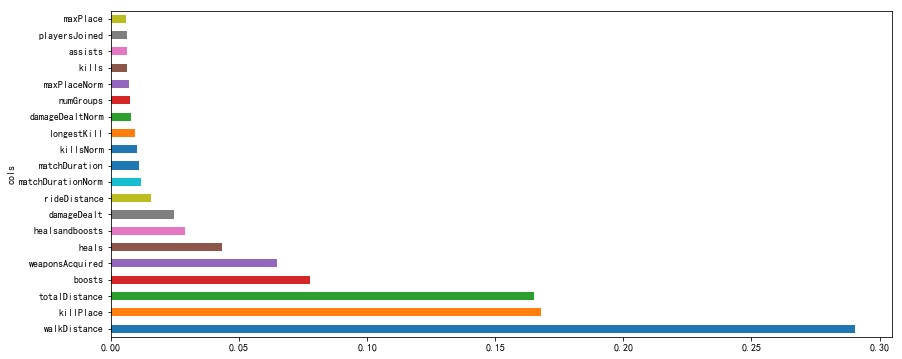

In [96]:
# Plot a feature importance graph for the 20 most important features
# 绘制特征重要性程度图，仅展示排名前二十的特征
plot_fea = imp_df[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot_fea

In [97]:
# 保留比较重要的特征
to_keep = imp_df[imp_df.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  20


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
22      weaponsAcquired
5                 heals
29       healsandboosts
2           damageDealt
16         rideDistance
28    matchDurationNorm
11        matchDuration
25            killsNorm
10          longestKill
26      damageDealtNorm
13            numGroups
27         maxPlaceNorm
8                 kills
0               assists
24        playersJoined
12             maxPlace
Name: cols, dtype: object

In [98]:
# 由这些比较重要的特征值，生成新的df
df[to_keep].head()

,walkDistance,killPlace,totalDistance,boosts,weaponsAcquired,heals,healsandboosts,damageDealt,rideDistance,matchDurationNorm,matchDuration,killsNorm,longestKill,damageDealtNorm,numGroups,maxPlaceNorm,kills,assists,playersJoined,maxPlace
565181,1086.00,29,1277.538,0,2,0,0,0.0,187.4,1446.64,1352,1.07,10.590,0.000,46,50.29,1,0,93,47
1278768,42.73,70,42.730,0,2,0,0,0.0,0.0,1472.04,1363,0.00,0.000,0.000,86,99.36,0,0,92,92
884983,2972.00,23,2972.000,4,4,2,6,170.1,0.0,1325.00,1250,1.06,29.140,180.306,27,28.62,1,1,94,27
3040251,2661.00,22,2661.000,2,5,5,7,273.2,0.0,1402.50,1375,1.02,37.580,278.664,27,28.56,1,0,98,28
2285385,32.64,44,32.640,0,1,0,0,178.0,0.0,1568.32,1508,1.04,9.181,185.120,48,50.96,1,1,96,49


In [99]:
# 重新制定训练集和测试集
df_keep = df[to_keep]
X_train, X_valid = split_vals(df_keep, n_trn)

In [100]:
# 模型训练
m2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
# 模型评分
y_pre = m2.predict(X_valid)
m2.score(X_valid, y_valid)

0.9264190806368511

In [102]:
# mae评估
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

0.059019711933656814

In [103]:
print(m2.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>
